In [1]:
import h5py
import numpy as np
from tqdm import tqdm

## Read data

free_pol.h5 stores free self-avoiding polymer chains, dim = (7 different v's, 100,000 chains, N=100, 3)\
v = (0, 0.25, 0.5, 0.75, 1, 1.25, 1.5)

In [2]:
with h5py.File("free_pol.h5", 'r') as file:
    stored_data = file['pol'][:]
    print("Shape of stored data:", stored_data.shape)

Shape of stored data: (7, 100000, 100, 3)


## Check SAW

In [3]:
from Check_saw import *

In [4]:
v = np.linspace(0,1.5,7)
for i, reservoir in enumerate(stored_data[1:]):
    for j, chain in tqdm(enumerate(reservoir)):
        if not check_SAW(chain, v[i+1]):
            print(i,j)

100000it [13:27, 123.90it/s]
100000it [13:13, 126.06it/s]
100000it [13:08, 126.78it/s]
100000it [13:20, 124.90it/s]
1204it [00:09, 132.86it/s]

4 1175


100000it [13:56, 119.48it/s]
100000it [14:05, 118.30it/s]


## Fit radial distributions

In [3]:
from Fitting import *
from Plot_mc_dist import *

Generate the site-site distance distribution

In [4]:
pairs = [(15,80),(35,70),(40,60)]
dl=[]
for data_v in stored_data:
    dl.append(d_dstr(pairs, data_v))

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.38it/s]


Fit the data to a Gaussian mdoel, or our model

In [5]:
fitted_gaussian_params = fit_mean_var(dl, generate_gaussian)
fitted_model_params = fit_mean_var(dl, generate_model, pairs)

100%|█████████████████████████████████████████████| 6/6 [00:04<00:00,  1.36it/s]


## Plot radial distribution fit

Plot radial distribution fit for v = 1

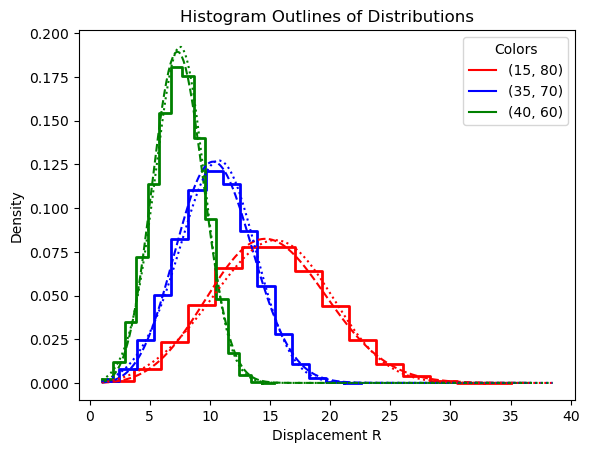

In [6]:
pltt, ax, legs = plot_distributions(dl[4], [pairs])
i=4
plot_prediction(ax, lambda j: generate_gaussian(i,j), fitted_gaussian_params[i], "dashed")
plot_prediction(ax, lambda j, pairs: generate_model(i,j, pairs), fitted_model_params[i], "dotted", pairs)

Plot radial distribution fit for (35,70) for different v's

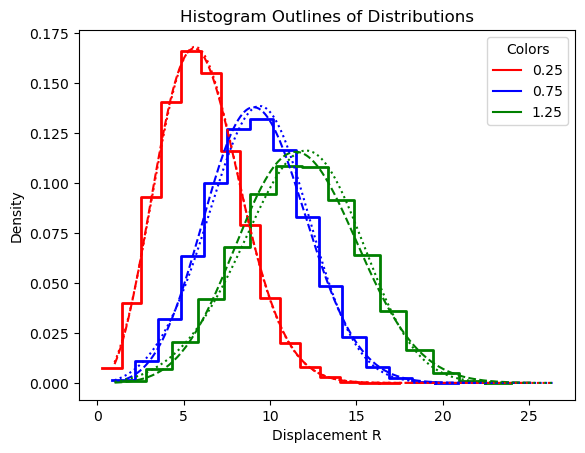

In [7]:
pltt, ax, legs = plot_distributions([d[1] for d in dl[1::2]], [np.linspace(0,1.5,7)[1::2]])
j=1
plot_prediction(ax, lambda i: generate_gaussian(i,j), 
                [fgp[1] for fgp in fitted_gaussian_params[1::2]], "dashed")
plot_prediction(ax, lambda i, pairs: generate_model(i,j, pairs), 
                [fgp[1] for fgp in fitted_model_params[1::2]], "dotted", pairs)

## Plot vector distribution

Plot vector distribution fit for v = 1

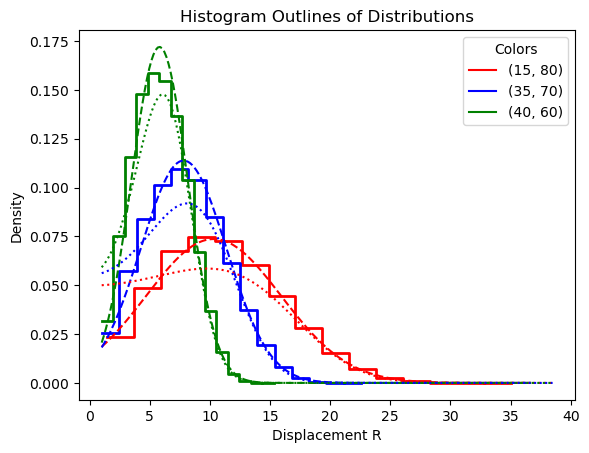

In [8]:
pltt, ax, legs = plot_distributions_vector(dl[4], [pairs])
i=4
plot_prediction(ax, lambda j: generate_gaussian_vector(i,j), fitted_gaussian_params[i], "dashed")
plot_prediction(ax, lambda j, pairs: generate_model_vector(i,j, pairs), fitted_model_params[i], "dotted", pairs)

Plot vector distribution fit for (35,70) for different v's

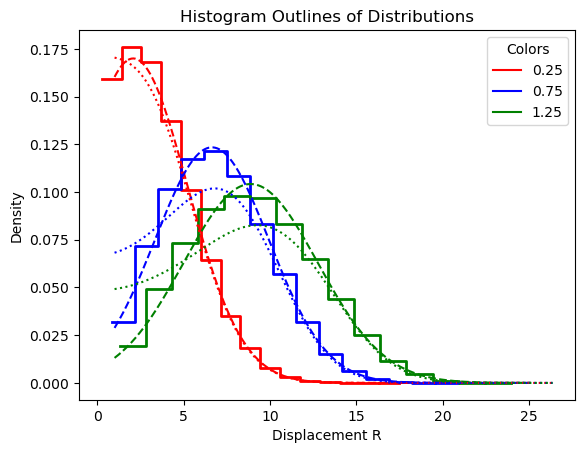

In [9]:
pltt, ax, legs = plot_distributions_vector([d[1] for d in dl[1::2]], [np.linspace(0,1.5,7)[1::2]])
j=1
plot_prediction(ax, lambda i: generate_gaussian_vector(i,j), 
                [fgp[1] for fgp in fitted_gaussian_params[1::2]], "dashed")
plot_prediction(ax, lambda i, pairs: generate_model_vector(i,j, pairs), 
                [fgp[1] for fgp in fitted_model_params[1::2]], "dotted", pairs)